# Section 3.3 Single Model Numerical Diagnostics

In [1]:
import arviz as az

## What happened to hard numbers?
One criticism of visual plots is that while objectively calculated, their interpretation is subjective. Also when running one model its relatively simple to visually inspect the results, but if testing out various models looking over many traceplots and autocorrelation diagrams becomes statistician time intensive. (We'll talk more about multiple models in Section 5.) Luckily some smart minds have realized this as well and have provided a solutions.


## $\hat{R}$ and Effective Sample Size
Recall the two pertinent questions MCMC practioners should always ask when making Posterior estimations

* Did the chains mix well?
* Did we get enough samples?


These questions are paraphrased from the paper published in March of 2019 **Rank-normalization, folding, and localization: An improved $\hat{R}$ for assessing convergence of MCMC** by [Vehtari etal](https://arxiv.org/abs/1903.08008), and thankfully the paper provides $\hat{R}$ and Effective Sample Size (ESS) as tools to help answer them.

### Warning: Active Research Zone
Bayesian Statistics is an ever evolving field and numerous versions of $\hat{R}$ and Effective Sample Size (ESS) calculations have been proposed over the years. the first of which was published way back in 1992. In this tutorial we will be covering the calucation from the 2019 paper (linked again [here]((https://arxiv.org/abs/1903.08008)))
Just be mindful that when looking at older papers or results the diagnostics will answer the same question, but the exact calculation may differ.

The prior papers are linked here for reference.

[Gelman and Rubin (1992)](https://projecteuclid.org/euclid.ss/1177011136)  
[Brooks and Gelman (1998)](http://www2.stat.duke.edu/~scs/Courses/Stat376/Papers/ConvergeDiagnostics/BrooksGelman.pdf)  
[Gelman et al. Bayesian Data Analysis (2014)](http://www.stat.columbia.edu/~gelman/book/)



### $\hat{R}$ (also known as R hat)
The first question we'll try and answer is if the chains have mixed well. The summarized formula is

$$ \Large \hat{R} = \sqrt{\frac{\hat{\text{var}}^{+}(\theta \mid y)}{W}}$$

While the details of the calculation can be found in the paper, calculation uses the *between chain variance* with *in chain variance* to calculate $\hat{R}$

**Note in the paper, it says Rhat "estimates the factor by which the scale of the current distribution for $\theta$ might be reduced. What does this mean specifically?**


### Effective Sample Size, (Also known as ESS, also known as $S_{eff}$
As the name suggests Effective Sample Size helps answer the question "Did we get enough samples". The summarized formula is  

$$ \large S_{\text{eff}} = \frac{NM}{\hat{\tau}} $$

Where N is computation draws, M is the number of chains and $\hat{\tau}$ is a number derived from the chain autocorrelations. The idea here is that in highly autocorrelated chains, while the computer *is* drawing samples they're not effective because they're not doing much to help estimate the posterior. 

Let's walk through an example

## Reliving the horror of naive Metropolis Hastings with Bad Initialization
In Section 3.1 we performed an Inference Run with nightmareish results. Let's load the data again here and plot the visual diagnostics once again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8da99c3c18>,
      dtype=object)

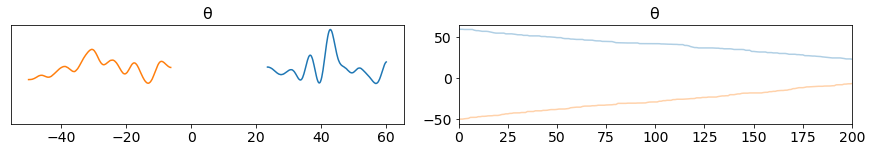

In [2]:
data_bad_init = az.load_data("inference_data/data_bad_init.nc")
az.plot_trace(data_bad_init)

Looking again at the trace plots we can "see" that the results look bad, but like true statisticians let's use our numerical tools to quantify the results.

In [3]:
az.rhat(data_bad_init)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 6.95

In [4]:
az.effective_sample_size(data_bad_init)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    θ        float64 1.0

According to the math $\hat{R} = 6.95$ and $S_{\text{eff}} = 1$, but this begs the question these good, bad, okish? Subjectively speaking these are bad. Generally speaking

* We want $\hat{R}$ to be to close to 1 as possible
* We want ESS to be as close to the number of simulation draws as possible  

$\hat{R}$ is telling us that the variances between chains are not very consistent and $S_{\text{eff}}$ is telling us that out of the 400 draws (200 draws over 2 chains), only 1 is useful in estimating the posterior distribution.  


In Aki's paper the advice there is specific advice for these diagnostics

* Run 4 chains
* $\hat{R}$ should be less than 1.01
* ESS should be 400 "before we expect $\hat{R}$ to be useful

In Notebook 3.4 we'll be using $\hat{R}$ and $S_{\text{eff}}$ to compare each inference run